In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load the dataset
file_path = '/kaggle/input/ai-summer-training-iti-group-4/diabetes.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset and basic information
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [4]:
# Replace zero values with the median of their respective columns (excluding zero values)
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with median
for column in columns_to_fix:
    median_value = data[column][data[column] != 0].median()
    data[column] = data[column].replace(0, median_value)

In [5]:

# Save the cleaned data to a new CSV file
cleaned_file_path = '/kaggle/working/diabetes_cleaned.csv'
data.to_csv(cleaned_file_path, index=False)

In [6]:
# Load the dataset
file_path = '/kaggle/working/diabetes_cleaned.csv'
data = pd.read_csv(file_path)

# Set the style for the plots
sns.set(style="whitegrid")

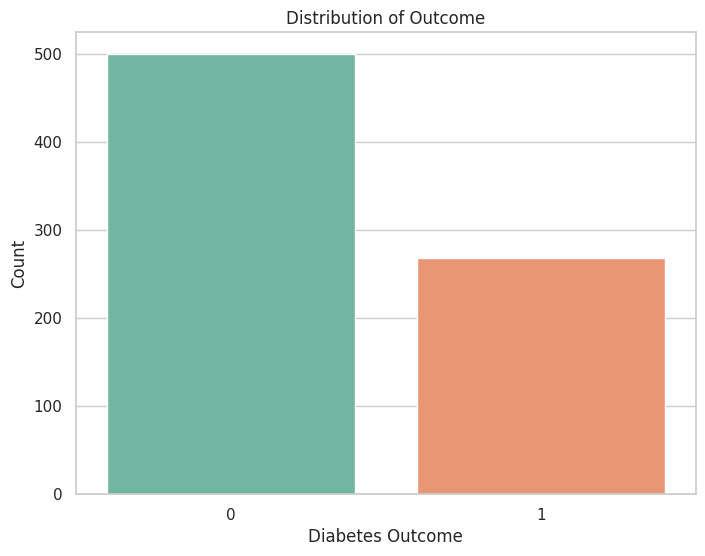

In [7]:
# 1. Distribution of the Outcome variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=data, palette="Set2")
plt.title('Distribution of Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

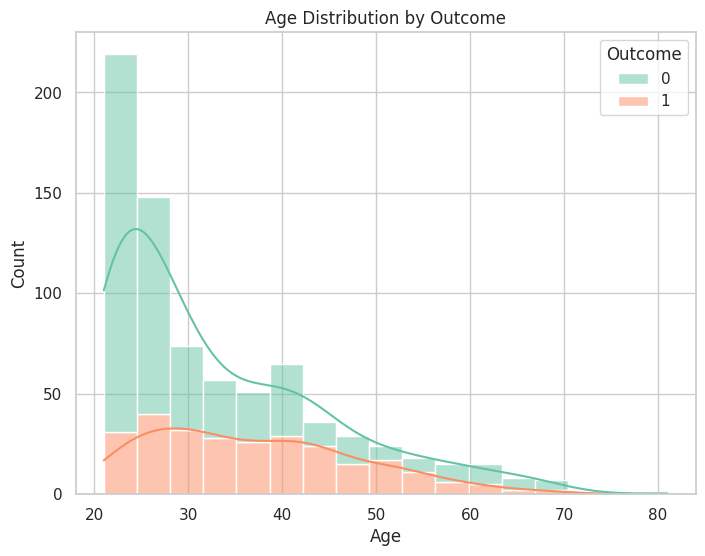

In [8]:
# 2. Distribution of Age in relation to Outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Outcome', multiple='stack', palette="Set2", kde=True)
plt.title('Age Distribution by Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

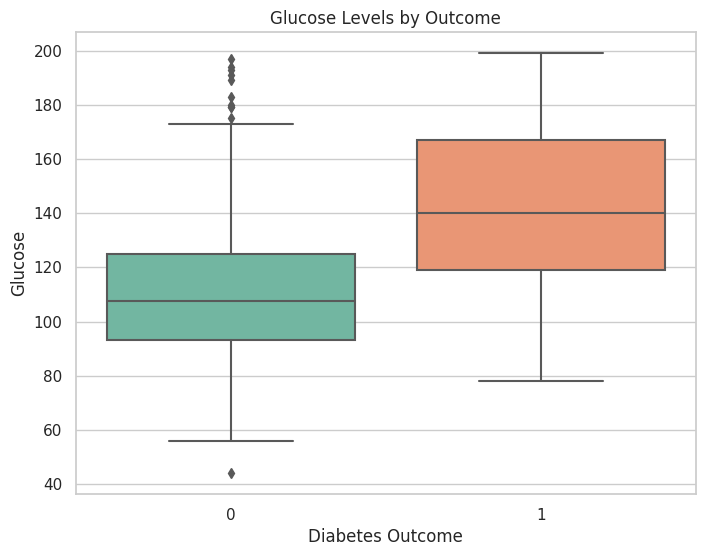

In [9]:
# 3. Relationship between Glucose and Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette="Set2")
plt.title('Glucose Levels by Outcome')
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose')
plt.show()

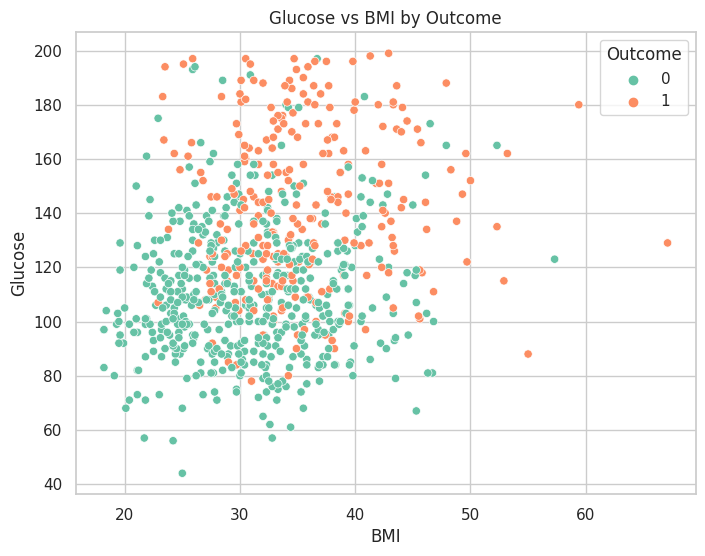

In [10]:
# 4. Relationship between BMI and Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=data, palette="Set2")
plt.title('Glucose vs BMI by Outcome')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()

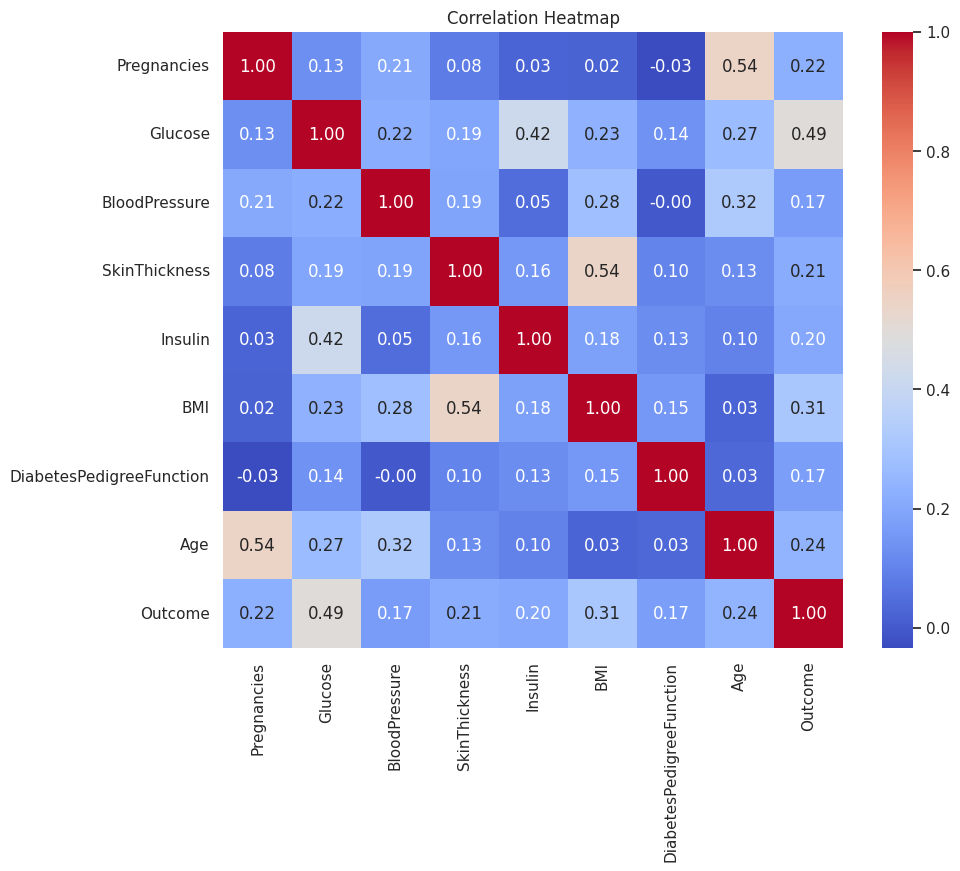

In [11]:
# 5. Correlation heatmap of the features
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


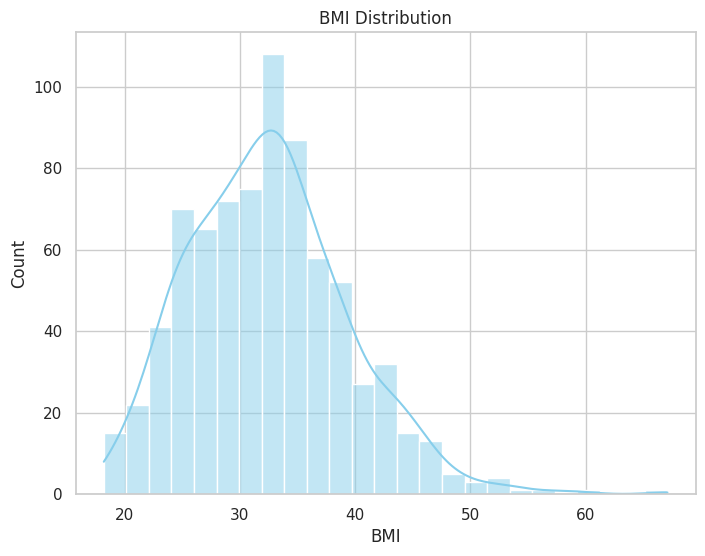

In [12]:
# 6. Distribution of BMI
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='BMI', kde=True, color='skyblue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

#  linear regression

In [13]:
# Define the features (X) and the target (y)
X = data.drop(columns=['DiabetesPedigreeFunction'])
y = data['DiabetesPedigreeFunction']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.08778590716347096
R-squared: 0.07551176904020585


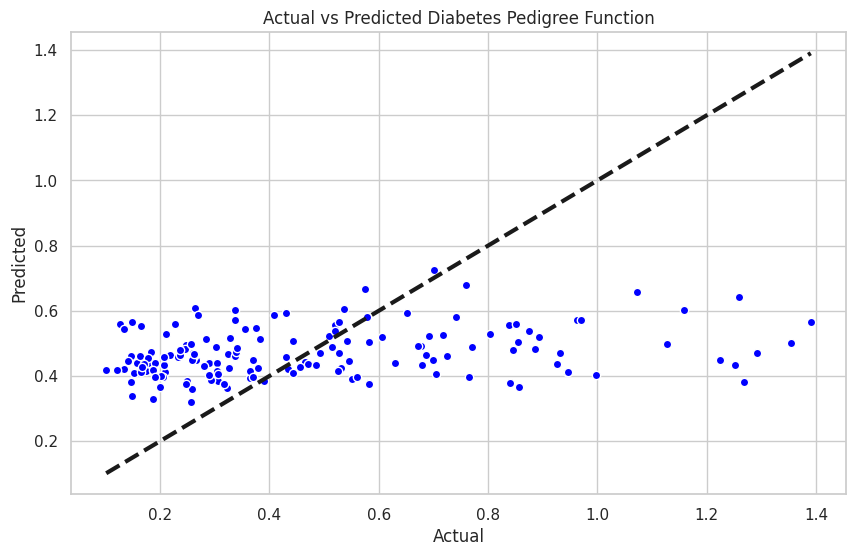

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Diabetes Pedigree Function')
plt.show()

#  Random Forest Regressor

In [18]:
# Define the features (X) and the target (y)
X = data.drop(columns=['DiabetesPedigreeFunction'])
y = data['DiabetesPedigreeFunction']


In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [21]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")


Random Forest - Mean Squared Error: 0.0967028454487013
Random Forest - R-squared: -0.01839401569514343


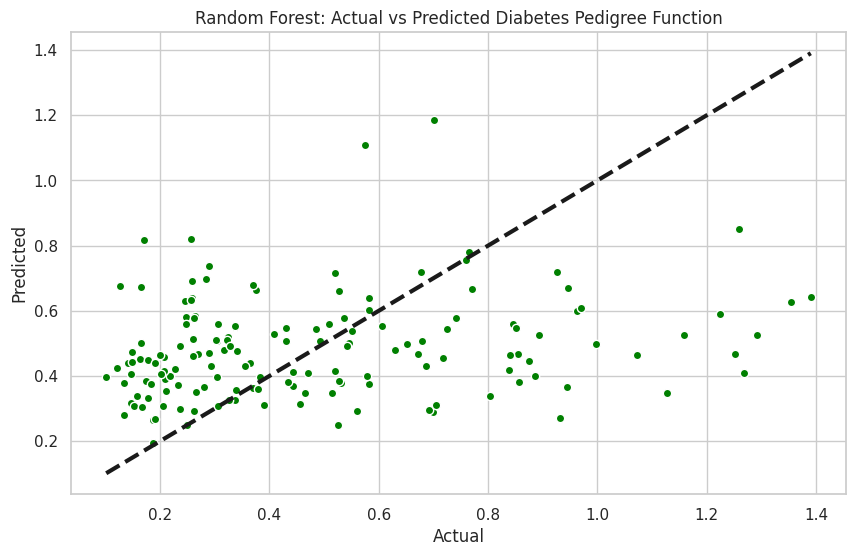

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', edgecolor='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted Diabetes Pedigree Function')
plt.show()


# Classification with K-Nearest Neighbors (KNN)

In [23]:
# Load the dataset
file_path = '/kaggle/working/diabetes_cleaned.csv'
data = pd.read_csv(file_path)


In [24]:
# Features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [25]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:

# K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [28]:
# Predictions
y_pred = knn.predict(X_test_scaled)


In [29]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [30]:
# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[74 25]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



# Classifacation with Neural Network and confusion matrix

In [31]:

# Features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [32]:

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Building the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(16, activation='relu'))  # Second hidden layer
model.add(Dense(8, activation='relu'))   # Third hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# Training the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_data=(X_test_scaled, y_test), verbose=1)


Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5630 - loss: 0.6811 - val_accuracy: 0.6429 - val_loss: 0.6273
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6807 - loss: 0.5881 - val_accuracy: 0.6688 - val_loss: 0.5521
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7610 - loss: 0.4837 - val_accuracy: 0.7403 - val_loss: 0.5167
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7463 - loss: 0.4796 - val_accuracy: 0.7532 - val_loss: 0.5048
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7805 - loss: 0.4399 - val_accuracy: 0.7468 - val_loss: 0.5021
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7828 - loss: 0.4389 - val_accuracy: 0.7403 - val_loss: 0.5025
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8080 - loss: 0.4338 - val_accuracy: 0.7338 - val_loss: 0.5058
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7761 - loss: 0.4290 - val_accuracy: 0.7338 - val_loss:

In [37]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)


In [38]:
# Predictions and evaluation
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [39]:
# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [40]:
print(f"Test Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Test Accuracy: 0.75
Confusion Matrix:
[[78 21]
 [18 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Classifacation with Neural Network 

In [41]:
# Features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [42]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Building the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(16, activation='relu'))  # Second hidden layer
model.add(Dense(8, activation='relu'))   # Third hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
# Training the model
history = model.fit(X_train_scaled, y_train, epochs=150, batch_size=10, validation_data=(X_test_scaled, y_test), verbose=1)


Epoch 1/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6299 - loss: 0.6684 - val_accuracy: 0.6753 - val_loss: 0.6097
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7144 - loss: 0.5666 - val_accuracy: 0.7468 - val_loss: 0.5143
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7528 - loss: 0.4798 - val_accuracy: 0.7792 - val_loss: 0.4905
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7609 - loss: 0.4662 - val_accuracy: 0.7857 - val_loss: 0.4836
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7650 - loss: 0.4539 - val_accuracy: 0.7857 - val_loss: 0.4850
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.4383 - val_accuracy: 0.7468 - val_loss: 0.4900
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8052 - loss: 0.4022 - val_accuracy: 0.7792 - val_loss: 0.4883
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7725 - loss: 0.4305 - val_accuracy: 0.7727 - v

In [47]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.69
